<a href="https://colab.research.google.com/github/ikonushok/My_studying_Data-Science-and-Neyro-Nets-on-Python/blob/master/%D0%94%D0%97_9_Pro_%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8_%D1%80%D0%B5%D0%BE%D1%80%D0%B3%D0%B0%D0%BD%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BC%D0%B0%D1%81%D1%81%D0%B8%D0%B2%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRO задание
Напишите “автокодировщик”, который будет из рукописных цифр MNIST генерировать из соответствующего изображения на CIFAR или Fashion Mnist, т.е. генерируйте из цифры MNIST - картинки CIFAR соответствующего класса

Сделайте такую же генерацию Fashion Mnist:
* Fashion Mnist успешно генерируется, а Cifar10 нет, на проверочной выборке получаются цветные образы, но не чистые изображения
* это не совсем автокодировщик, так как у автокодировщика вход строго равен выходу, но архитектура очень близкая к автокодировщику

## Загружаем MNIST и *CIFAR10*

In [ ]:
from tensorflow.keras.datasets import mnist, cifar10, fashion_mnist

import numpy as np
import random

# графика
import matplotlib.pyplot as plt # графики
from PIL import Image # изображжения
%matplotlib inline

In [ ]:
import os
os.chdir('/content/drive/My Drive/Занятие_9_Автокодировщики/data')

In [ ]:
(x_mnist, y_mnist), (x_test, y_test) = mnist.load_data()

arr_mnist = [] # Массив с индексами изображений каждого класса
X = []
for i in range(10):
  indexes = np.where(y_mnist==i)[0] # получили список из индексов положение класса i в y_train
  arr_mnist.append(indexes)
  print(i, len(arr_mnist[i])) # Посмотрим число обьектов в каждом классе
  for j in range(len(arr_mnist[i])): # создла упорядоченный по класаам массив по 5000 элементов в каждлм классе
    if j <= 4999: 
      n = indexes[j]
      X.append(x_mnist[n])

X = np.array(X) # превратил список в массив
print('Было: ', x_mnist.shape, '\nНовый упорядоченный массив: ', X.shape)

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949
Было:  (60000, 28, 28) 
Новый упорядоченный массив:  (50000, 28, 28)


In [ ]:
(x_f_mnist, y_f_mnist), (x_test, y_test) = fashion_mnist.load_data()

arr_f_mnist = [] # Массив с индексами изображений каждого класса
Y = []
for i in range(10):
  indexes = np.where(y_f_mnist==i)[0] # получили список из индексов положение класса i в y_train
  arr_f_mnist.append(indexes)
  print(i, len(arr_f_mnist[i])) # Посмотрим число обьектов в каждом классе
  for j in range(len(arr_f_mnist[i])): # создла упорядоченный по класаам массив по 5000 элементов в каждлм классе
    if j <= 4999: 
      n = indexes[j]
      Y.append(x_f_mnist[n])

Y = np.array(Y) # превратил список в массив
print('Было: ', x_f_mnist.shape, '\nНовый упорядоченный массив: ', Y.shape)
print()

0 6000
1 6000
2 6000
3 6000
4 6000
5 6000
6 6000
7 6000
8 6000
9 6000
Было:  (60000, 28, 28) 
Новый упорядоченный массив:  (50000, 28, 28)



In [ ]:
(x_cifar10, y_train10), (x_test10, y_test10) = cifar10.load_data()

arr_cifar10 = [] # Массив с индексами изображений каждого класса
C = []
for i in range(10):
  indexes = np.where(y_train10==i)[0] # получили список из индексов положение класса i в y_train
  arr_cifar10.append(indexes)
  print(i, len(arr_cifar10[i])) # Посмотрим число обьектов в каждом классе
  for j in range(len(arr_cifar10[i])): # создла упорядоченный по класаам массив по 5000 элементов в каждлм классе
    if j <= 4999: 
      n = indexes[j]
      C.append(x_cifar10[n])

C = np.array(Y) # превратил список в массив
print('Было: ', x_cifar10.shape, '\nНовый упорядоченный массив: ', C.shape)
print()

0 5000
1 5000
2 5000
3 5000
4 5000
5 5000
6 5000
7 5000
8 5000
9 5000
Было:  (50000, 32, 32, 3) 
Новый упорядоченный массив:  (50000, 28, 28)



In [ ]:
print ('\n', X.shape, '\t:MNIST\n', Y.shape, '\t:Fahsion Mnist\n', C.shape, '\t:Cifar10')


 (50000, 28, 28) 	:MNIST
 (50000, 28, 28) 	:Fahsion Mnist
 (50000, 28, 28) 	:Cifar10


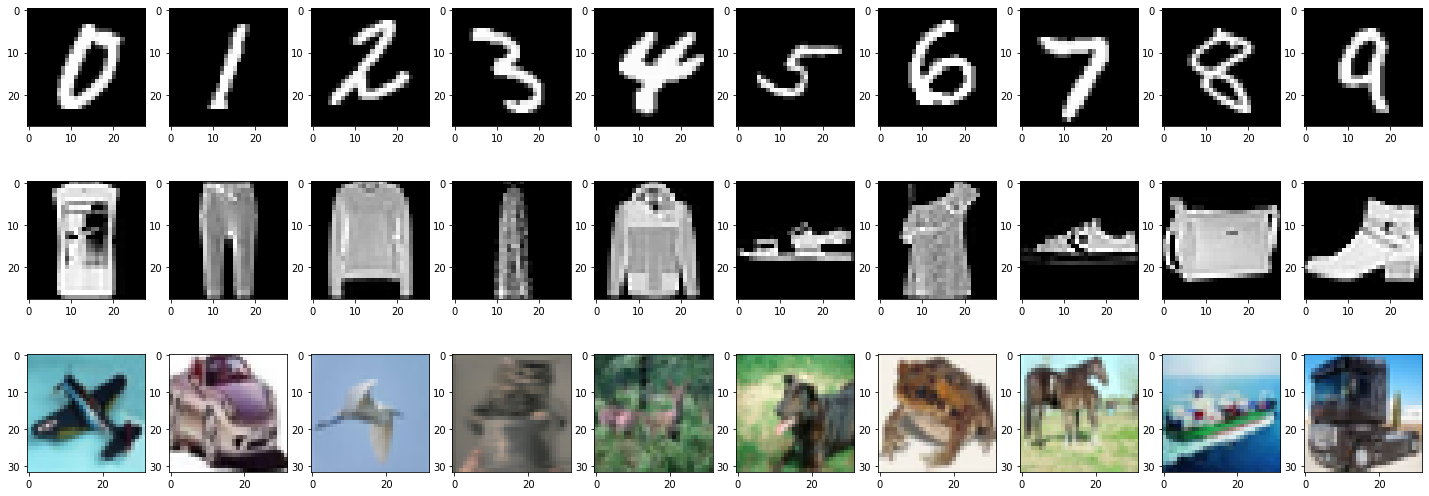


 (60000, 28, 28) 	:MNIST
 (60000, 28, 28) 	:Fahsion Mnist
 (50000, 32, 32, 3) 	:Cifar10


In [ ]:
# Выведем соответствующие друг другу обьекты
fig, axs = plt.subplots(3, 10, figsize=(25, 9))
for i in range(10):

  axs[0, i].imshow(Image.fromarray(x_mnist[random.choice(arr_mnist[i])]), cmap='gray') # отрисовка изображений
  axs[1, i].imshow(Image.fromarray(x_f_mnist[random.choice(arr_f_mnist[i])]), cmap='gray') # отрисовка изображений
  axs[2, i].imshow(Image.fromarray(x_cifar10[random.choice(arr_cifar10[i])]), cmap='gray') # отрисовка изображений

plt.show() # показываем изображения

print ('\n', x_mnist.shape, '\t:MNIST\n', x_f_mnist.shape, '\t:Fahsion Mnist\n', x_cifar10.shape, '\t:Cifar10')

In [ ]:
X = X.astype('float32')/255 # представляем в виде значений от 0 до 1
Y = Y.astype('float32')/255 # представляем в виде значений от 0 до 1
C = C.astype('float32')/255 # представляем в виде значений от 0 до 1

In [ ]:
from sklearn.model_selection import train_test_split
# Перемешиваю и делю елю на обучающий и тестовые наборы
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = True)
print (x_train.shape, ':x_train', x_test.shape, ':x_test\n', y_train.shape, ':y_test', y_test.shape, ':y_test')

(40000, 28, 28) :x_train (10000, 28, 28) :x_test
 (40000, 28, 28) :y_test (10000, 28, 28) :y_test


### Функции графики и ошибок

In [ ]:
def getMSE(x1, x2): # создадим функцию среднеквадратичной ошибки
  x1 = x1.flatten() # сплющиваем в одномерный вектор
  x2 = x2.flatten() # сплющиваем в одномерный вектор
  delta = x1 - x2 # находим разницу
  return sum(delta ** 2) / len(delta) # и возвращаем сумму квадратов разницы, делённую на длину разницы

In [ ]:
from random import randint

def printImages(x, img_height, img_width): # создадим функцию для вывода изображений как картинок
  n = 10  # количество картинок, которые хотим показать
  plt.figure(figsize=(20, 8)) # указываем размеры фигуры
  shape=(img_height, img_width)
  for i in range(n): # для каждой картинки из n(5)
      # Показываем картинки из тестового набора
      ax = plt.subplot(2, n, i + 1) # выведем область рисования Axes
      plt.imshow(x[randint(i*5000, i*5000+1000)].reshape(shape)) # отрисуем правильные картинки в размере 112*80      
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

  plt.show()

## Fashion Mnist

In [ ]:
from tensorflow.keras.models import Model
# Из кераса загружаем необходимые слои для нейросети
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape, Conv2DTranspose
from tensorflow.keras.layers import  UpSampling2D, MaxPooling2D, Conv2D, BatchNormalization
#from tensorflow.keras import backend as K # подтягиваем базовые керасовские функции
from tensorflow.keras.optimizers import Adam, Nadam, Adamax, RMSprop # загружаем выбранный оптимизатор
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras import utils # загружаем утилиты кераса
from keras.utils import plot_model

import pandas as pd # библиотека для анализа и обработки данных
from sklearn.model_selection import train_test_split # модуль для разбивки выборки на тренировочную/тестовую

### Создание сети

In [ ]:
def baseAutoencoder_fM(shape=(28,28,1)): # зададим функцию создания базового автокодировщика
  img_input = Input((shape)) # задаём входные размеры
  k=4
  l=1

  e = Conv2D(32*k, (3, 3), activation='relu', padding='same')(img_input)
  e = Conv2D(64*k, (3, 3), activation='relu', padding='same')(e)
  e = Conv2D(128*k*l, (3, 3), activation='relu', padding='same', strides=2)(e)
  e = Conv2D(128*k*l, (3, 3), activation='relu', padding='same', strides=2)(e)
  e = BatchNormalization()(e)

  d = Conv2D(128*k*l, (3, 3), activation='relu', padding='same')(e)
  d = Conv2D(64*k, (3, 3), activation='relu', padding='same')(d)
  d = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
  d = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
  d = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(d)

  model = Model(img_input, d)
  model.compile(optimizer=Adamax(lr=0.0001), loss='mse')

  return model # функция вернёт заданную модель

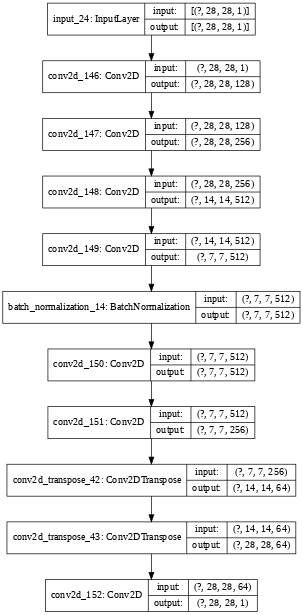

In [ ]:
model_fM = baseAutoencoder_fM() # создаем автокодировщик
plot_model(model_fM, dpi=50, show_shapes=True, show_layer_names=True)

### Обучение сети

In [ ]:
#Коллбэки
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 0, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-06, verbose = 1)

history = model_fM.fit(x_train, y_train, epochs=30, 
                       validation_data = (x_test, y_test),
                       verbose = 1,
                       callbacks = [early_stopping, reduce_lr])

Epoch 1/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0755 - val_loss: 0.0691
Epoch 2/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0639 - val_loss: 0.0632
Epoch 3/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0609 - val_loss: 0.0605
Epoch 4/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0593 - val_loss: 0.0592
Epoch 5/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0583 - val_loss: 0.0586
Epoch 6/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0575 - val_loss: 0.0583
Epoch 7/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0570 - val_loss: 0.0577
Epoch 8/30
1250/1250 [==============================] - 19s 16ms/step - loss: 0.0564 - val_loss: 0.0578
Epoch 9/30
1250/1250 [==============================] - 19s 16ms/step - loss: 0.0560 - val_loss: 0.0569
Epoch 10/30
1250/1250 [==============================] - 19s 16m

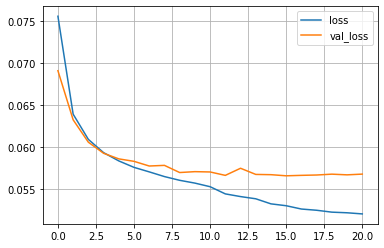

In [ ]:
#Выводим график точности распознавания на обучающей и проверочной выборках
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.legend()
plt.grid()
plt.show()

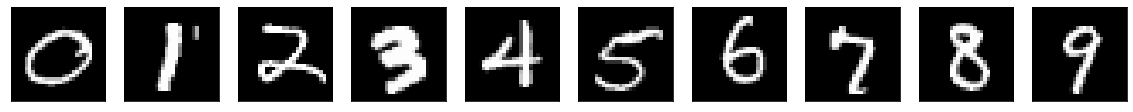

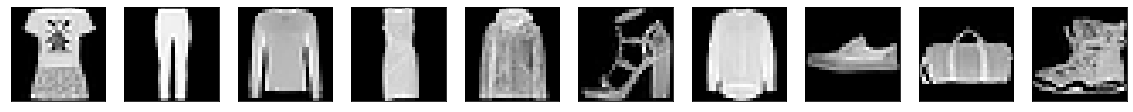

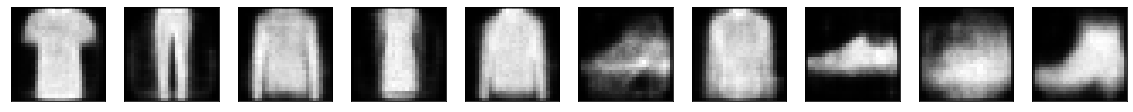

In [ ]:
printImages(X, 28, 28)
printImages(Y, 28, 28)
printImages(model_fM.predict(X), 28, 28)

## Cifar10

In [ ]:
# Перемешиваю и делю елю на обучающий и тестовые наборы
x_train, x_test, y_train, y_test = train_test_split(X, C, test_size=0.2, random_state = True)
print (x_train.shape, ':x_train', x_test.shape, ':x_test\n', y_train.shape, ':y_test', y_test.shape, ':y_test')

(40000, 28, 28) :x_train (10000, 28, 28) :x_test
 (40000, 32, 32, 3) :y_test (10000, 32, 32, 3) :y_test


In [ ]:
def baseAutoencoder_c10(shape=(28,28,1)): # зададим функцию создания базового автокодировщика
  img_input = Input((shape)) # задаём входные размеры
  k=4
  l=2

  e = Conv2D(32*k, (3, 3), activation='relu', padding='same')(img_input)
  e = Conv2D(64*k*l, (3, 3), activation='relu', padding='same', strides=2)(e)
  e = Conv2D(128*k*l, (3, 3), activation='relu', padding='same', strides=2)(e)
  e = Conv2D(256*k*l, (3, 3), activation='relu', padding='same', strides=2)(e)
  e = BatchNormalization()(e)

  d = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', activation='relu')(e)
  d = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
  d = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
  d = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(d)

  model = Model(img_input, d)
  model.compile(optimizer=Adamax(lr=0.0001), loss='mse')

  return model # функция вернёт заданную модель

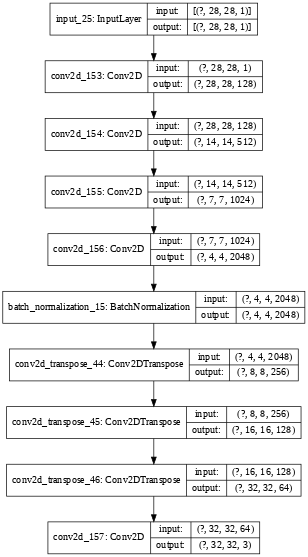

In [ ]:
model_c10 = baseAutoencoder_c10() # создаем автокодировщик
plot_model(model_c10, dpi=50, show_shapes=True, show_layer_names=True)

In [ ]:
#Коллбэки
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 0, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-06, verbose = 1)

history = model_c10.fit(x_train, y_train, epochs=30, 
                        validation_data = (x_test, y_test),
                        verbose = 1,
                        callbacks = [early_stopping, reduce_lr])

Epoch 1/30
1250/1250 [==============================] - 34s 28ms/step - loss: 0.0084 - val_loss: 4.2245e-06
Epoch 2/30
1250/1250 [==============================] - 34s 27ms/step - loss: 2.7812e-06 - val_loss: 2.1240e-06
Epoch 3/30
1250/1250 [==============================] - ETA: 0s - loss: 1.9728e-06
Epoch 00003: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1250/1250 [==============================] - 34s 27ms/step - loss: 1.9728e-06 - val_loss: 1.8453e-06
Epoch 4/30
1250/1250 [==============================] - 34s 27ms/step - loss: 1.7685e-06 - val_loss: 1.6760e-06
Epoch 5/30
1248/1250 [============================>.] - ETA: 0s - loss: 1.5618e-06
Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
1250/1250 [==============================] - 34s 27ms/step - loss: 1.5616e-06 - val_loss: 1.4392e-06
Epoch 6/30
1250/1250 [==============================] - 34s 27ms/step - loss: 1.3744e-06 - val_loss: 1.3054e-06
Epoch 7/30
1250/1250 [======

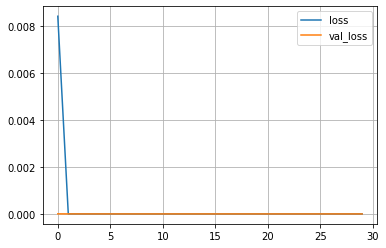

In [ ]:
#Выводим график точности распознавания на обучающей и проверочной выборках
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.legend()
plt.grid()
plt.show()

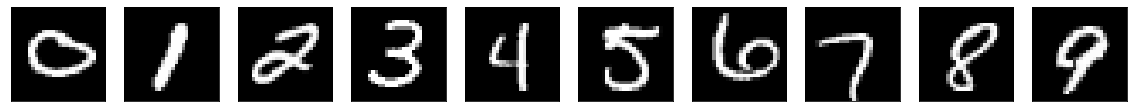

ValueError: ignored

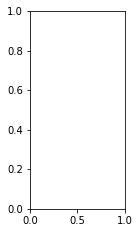

In [ ]:
printImages(X, 28, 28)
printImages(C, 32, 32)
printImages(model_c10.predict(X), 32, 32)

#Выводы
-----
1. К сожалению, мне не хватило знаний для отрисовки изображений. Так как расчеты качества обучения для Cifar10 показывают лучшее кечество6 чем на Fashion Mnisyt. И можно было бы учить дальше!
2. Работа с автокодировщиками хорошо тренирует пространственное мышление и работу с размерностями ))
3. Тема автокодировщиков очень интересна! Опять же жалко, что не хватает времени для того, чтобы разобраться в архитектуре сети - хотелось бы добиться лучшего качества
4. Много времени ушло на экспериментирование с архитектурой. Как всегда - чем проще данные, тем проще должна быть сеть. Это позволило упростить сетку, последовательно отключая слои. И ускорить ее работу. 
5. Также я перенес Conv2DTranspose в конец: сначала сжимал по одной оси, а потом стал сжимать по другой